In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edl
import constants as C
import plotting

%matplotlib widget

p_h = 13
default_gamma = 4
gamma_range = [3, 4, 5, 6]
conc_range = [10e-3, 100e-3, 1000e-3]

Electrostatic pressure on gold and silica

Sweep from 0.00V to -2.00V. Maximum relative residual: 3.59794e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.04234e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.61280e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.36087e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.61218e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.61662e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.62383e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.82711e-06.


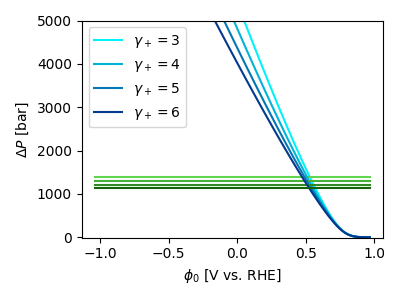

In [2]:
fig, ax = plt.subplots(figsize=(4,3))
potentials = np.linspace(-2, 0, 100)
potentials_v_rhe = potentials + C.AU_PZC_SHE_V + 59e-3 * p_h
for i, gamma in enumerate(gamma_range):
    gold = edl.Aqueous(1e-2, gamma, default_gamma, default_gamma, default_gamma)
    gold_sol = gold.potential_sweep(potentials, p_h=p_h)

    color = plotting.get_color_gradient(len(gamma_range), color='blue')[i]
    ax.plot(potentials_v_rhe, gold_sol['pressure']/1e5, color=color, label=rf'$\gamma_+=${gamma}')

    silica = edl.Aqueous(1e-2, gamma, default_gamma, default_gamma, default_gamma)
    silica_sol = silica.insulator_spatial_profiles(p_h=p_h, tol=1e-2)
    
    color = plotting.get_color_gradient(len(gamma_range), color='green')[i]
    ax.plot(potentials_v_rhe, np.ones(potentials.shape) * silica_sol['pressure'][0]/1e5, color=color)

ax.legend()
ax.set_xlabel(r'$\phi_0$ [V vs. RHE]')
ax.set_ylabel(r'$\Delta P$ [bar]')
ax.set_ylim([-10, 5000])
plt.tight_layout()

plt.savefig('figures/nano-pressures-catsize.pdf')

Sweep from 0.00V to -2.00V. Maximum relative residual: 3.59794e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.04230e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.61280e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.36094e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.61218e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.61669e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.62383e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.82704e-06.


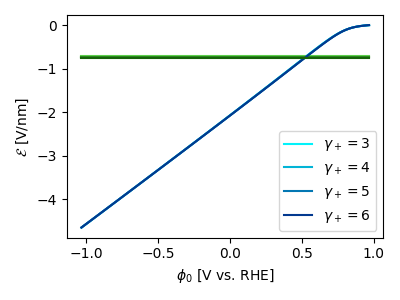

In [3]:
fig, ax = plt.subplots(figsize=(4,3))
potentials = np.linspace(-2, 0, 100)
potentials_v_rhe = potentials + C.AU_PZC_SHE_V + 59e-3 * p_h
for i, gamma in enumerate(gamma_range):
    gold = edl.Aqueous(1e-2, gamma, default_gamma, default_gamma, default_gamma)
    gold_sol = gold.potential_sweep(potentials, p_h=p_h)

    color = plotting.get_color_gradient(len(gamma_range), color='blue')[i]
    ax.plot(potentials_v_rhe, gold_sol['efield']/1e9, color=color, label=rf'$\gamma_+=${gamma}')

    silica = edl.Aqueous(1e-2, gamma, 8, 8, 8)
    silica_sol = silica.insulator_spatial_profiles(p_h=p_h, tol=1e-2)
    
    color = plotting.get_color_gradient(len(gamma_range), color='green')[i]
    ax.plot(potentials_v_rhe, np.ones(potentials.shape) * silica_sol['efield'][0]/1e9, color=color)

ax.legend()
ax.set_xlabel(r'$\phi_0$ [V vs. RHE]')
ax.set_ylabel(r'$\mathcal{E}$ [V/nm]')
plt.tight_layout()

plt.savefig('figures/nano-efield-catsize.pdf')

Electrostatic pressure, cation conc.

Sweep from 0.00V to -2.00V. Maximum relative residual: 3.61280e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.36087e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.62122e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.33970e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.59345e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 4.40378e-06.


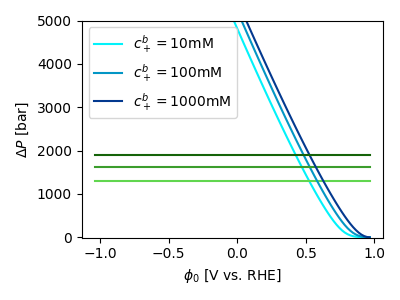

In [4]:
fig, ax = plt.subplots(figsize=(4,3))

potentials = np.linspace(-2, 0, 100)
potentials_v_rhe = potentials + C.AU_PZC_SHE_V + 59e-3 * p_h

current = np.zeros((len(conc_range), len(potentials)))
colors = plotting.get_color_gradient(len(conc_range))

for i, conc in enumerate(conc_range):
    gold = edl.Aqueous(conc, default_gamma, default_gamma, default_gamma, default_gamma)
    gold_sol = gold.potential_sweep(potentials, p_h=p_h)

    color = plotting.get_color_gradient(len(conc_range), color='blue')[i]
    ax.plot(potentials_v_rhe, gold_sol['pressure']/1e5, color=color, label=rf'$c_+^b=${conc*1000:.0f}mM')

    silica = edl.Aqueous(conc, default_gamma, default_gamma, default_gamma, default_gamma)
    silica_sol = silica.insulator_spatial_profiles(p_h=p_h, tol=1e-2)
    
    color = plotting.get_color_gradient(len(conc_range), color='green')[i]
    ax.plot(potentials_v_rhe, np.ones(potentials.shape) * silica_sol['pressure'][0]/1e5, color=color)

ax.legend()
ax.set_xlabel(r'$\phi_0$ [V vs. RHE]')
ax.set_ylabel(r'$\Delta P$ [bar]')
ax.set_ylim([-10, 5000])
plt.tight_layout()

plt.savefig('figures/nano-pressures-catconc.pdf')

Sweep from 0.00V to -2.00V. Maximum relative residual: 3.61280e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.36087e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.62122e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.33970e-06.
Sweep from 0.00V to -2.00V. Maximum relative residual: 3.59345e-05.
Sweep from 0.00V to 0.00V. Maximum relative residual: 0.00000e+00.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 4.40378e-06.


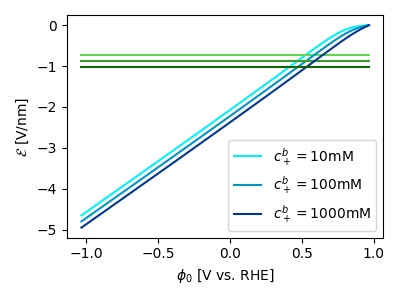

In [5]:
fig, ax = plt.subplots(figsize=(4,3))

potentials = np.linspace(-2, 0, 100)
potentials_v_rhe = potentials + C.AU_PZC_SHE_V + 59e-3 * p_h

current = np.zeros((len(conc_range), len(potentials)))
colors = plotting.get_color_gradient(len(conc_range))

for i, conc in enumerate(conc_range):
    gold = edl.Aqueous(conc, default_gamma, default_gamma, default_gamma, default_gamma)
    gold_sol = gold.potential_sweep(potentials, p_h=p_h)

    color = plotting.get_color_gradient(len(conc_range), color='blue')[i]
    ax.plot(potentials_v_rhe, gold_sol['efield']/1e9, color=color, label=rf'$c_+^b=${conc*1000:.0f}mM')

    silica = edl.Aqueous(conc, default_gamma, default_gamma, default_gamma, default_gamma)
    silica_sol = silica.insulator_spatial_profiles(p_h=p_h, tol=1e-2)
    
    color = plotting.get_color_gradient(len(conc_range), color='green')[i]
    ax.plot(potentials_v_rhe, np.ones(potentials.shape) * silica_sol['efield'][0]/1e9, color=color)

ax.legend()
ax.set_xlabel(r'$\phi_0$ [V vs. RHE]')
ax.set_ylabel(r'$\mathcal{E}$ [V/nm]')
plt.tight_layout()

plt.savefig('figures/nano-efield-catconc.pdf')

Nanostructure cation size trend

Sweep from -0.97V to -1.47V. Maximum relative residual: 3.31760e-05.
Sweep from -0.97V to -0.97V. Maximum relative residual: 3.31760e-05.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.02382e-06.
Sweep from -0.97V to -1.47V. Maximum relative residual: 6.21233e-05.
Sweep from -0.97V to -0.97V. Maximum relative residual: 6.21233e-05.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.33970e-06.
Sweep from -0.97V to -1.47V. Maximum relative residual: 1.97128e-05.
Sweep from -0.97V to -0.97V. Maximum relative residual: 1.97128e-05.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.59245e-06.
Sweep from -0.97V to -1.47V. Maximum relative residual: 3.85912e-05.
Sweep from -0.97V to -0.97V. Maximum relative residual: 3.85912e-05.
Sweep from pH 2.00 to 12.90. Maximum relative residual: 3.79932e-06.


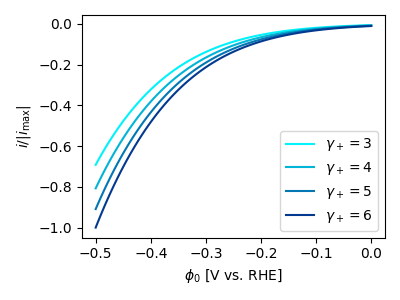

In [7]:
p_h = 13
fig, ax = plt.subplots(figsize=(4,3))

potentials_v_rhe = np.linspace(-0.5, 0, 100)
potentials = potentials_v_rhe - C.AU_PZC_SHE_V - 59e-3 * p_h

current = np.zeros((len(gamma_range), len(potentials)))
colors = plotting.get_color_gradient(len(gamma_range))

for i, gamma in enumerate(gamma_range):
    aq = edl.Aqueous(1e-1, gamma, default_gamma, default_gamma, default_gamma)
    aq_sol = aq.potential_sweep(potentials, p_h=p_h)
    silica = edl.Aqueous(1e-1, gamma, default_gamma, default_gamma, default_gamma)
    silica_sol = silica.insulator_spatial_profiles(p_h=p_h, tol=1e-2)    
    # frac_sioh = (C.N_SITES_SILICA + silica_sol['efield'][0]*silica_sol['eps'][0]*C.EPS_0/C.E_0) / C.N_SITES_SILICA
    reorganization = 2 * C.E_0 + np.abs(silica_sol['pressure'][0]) * 10 / aq.n_max
    reaction_energy = C.E_0 * (aq_sol['phi0'])
    e_act = (reorganization + reaction_energy) ** 2 / (4 * reorganization)
    # print(reorganization / C.E_0, np.max(np.abs(reaction_energy)) / C.E_0, np.max(e_act) / C.E_0, np.min(e_act) / C.E_0)
    current[i,:] = - np.exp(-C.BETA * e_act)

current = current / np.max(np.abs(current))

for i, gamma in enumerate(gamma_range):
    ax.plot(potentials_v_rhe, current[i,:], color=colors[i], label=rf'$\gamma_+=${gamma}')

ax.set_ylabel(r'$i/|i_\mathrm{max}|$')
ax.set_xlabel(r'$\phi_0$ [V vs. RHE]')
ax.legend()
# ax.set_ylim([-0.35, 1e-3])
plt.tight_layout()

plt.savefig('figures/nano_cation_size.pdf')

Nanostructure cation conc trend

Sweep from -0.61V to -0.86V. Maximum relative residual: 5.01880e-06.
Sweep from -0.61V to -0.61V. Maximum relative residual: 5.01880e-06.
Sweep from pH 2.00 to 6.90. Maximum relative residual: 1.39483e-06.
Sweep from -0.61V to -0.86V. Maximum relative residual: 1.11141e-05.
Sweep from -0.61V to -0.61V. Maximum relative residual: 1.11141e-05.
Sweep from pH 2.00 to 6.90. Maximum relative residual: 1.79359e-06.
Sweep from -0.61V to -0.86V. Maximum relative residual: 3.29356e-06.
Sweep from -0.61V to -0.61V. Maximum relative residual: 3.29356e-06.
Sweep from pH 2.00 to 6.90. Maximum relative residual: 4.40378e-06.


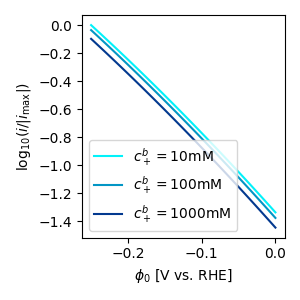

In [8]:
p_h = 7
fig, ax = plt.subplots(figsize=(3,3))

potentials_v_rhe = np.linspace(-0.25, 0, 100)
potentials = potentials_v_rhe - C.AU_PZC_SHE_V - 59e-3 * p_h

current = np.zeros((len(conc_range), len(potentials)))
colors = plotting.get_color_gradient(len(conc_range))

for i, conc in enumerate(conc_range):
    aq = edl.Aqueous(conc, default_gamma, default_gamma, default_gamma, default_gamma)
    aq_sol = aq.potential_sweep(potentials, p_h=p_h)
    silica = edl.Aqueous(conc, default_gamma, default_gamma, default_gamma, default_gamma)
    silica_sol = silica.insulator_spatial_profiles(p_h=p_h, tol=1e-2)        
    # frac_sioh = (C.N_SITES_SILICA + silica_sol['efield'][0]*silica_sol['eps'][0]*C.EPS_0/C.E_0) / C.N_SITES_SILICA
    reorganization = 2 * C.E_0 + np.abs(silica_sol['pressure'][0]) * 10 / aq.n_max
    reaction_energy = C.E_0 * (aq_sol['phi0'])
    e_act = (reorganization + reaction_energy) ** 2 / (4 * reorganization)
    current[i,:] = - np.exp(-C.BETA * e_act)
current = current / np.max(np.abs(current))

for i, conc in enumerate(conc_range):
    ax.plot(potentials_v_rhe, np.log10(-current[i,:]), color=colors[i], label=rf'$c_+^b=${conc*1000:.0f}mM')
    # ax.plot(potentials_v_rhe, current[i,:], color=colors[i], label=rf'$c_+^0=${conc*1000:.0f}mM')

ax.set_ylabel(r'$\log_{10} (i/|i_\mathrm{max}|)$')
ax.set_xlabel(r'$\phi_0$ [V vs. RHE]')
ax.legend()
# ax.set_ylim([-15, 1])
plt.tight_layout()

plt.savefig('figures/nano_cation_conc.pdf')

In [ ]:
ph_range = np.linspace(2, 13, 200)
fig, ax = plt.subplots(figsize=(3,3))

frac_sioh = np.zeros((len(gamma_range), len(ph_range)))
colors = plotting.get_color_gradient(len(gamma_range), color='green')

for i, gamma in enumerate(gamma_range):
    silica = edl.Aqueous(1e-1, gamma, default_gamma, default_gamma, default_gamma)
    silica_sol = silica.ph_sweep(ph_range, tol=1e-2) 
    frac_sioh[i, :] = (C.N_SITES_SILICA + silica_sol['charge'] / C.E_0) / C.N_SITES_SILICA
    
for i, gamma in enumerate(gamma_range):
    ax.plot(ph_range, frac_sioh[i,:], color=colors[i], label=rf'$\gamma_+=${gamma}')

ax.set_ylabel(r'$f_\mathrm{SiOH}$')
ax.set_xlabel(r'pH')
ax.legend()
ax.set_ylim([0, 1])
plt.tight_layout()

plt.savefig('figures/nano_sioh_cation_size.pdf')

In [ ]:
ph_range = np.linspace(2, 13, 200)
fig, ax = plt.subplots(figsize=(3,3))

frac_sioh = np.zeros((len(conc_range), len(ph_range)))
colors = plotting.get_color_gradient(len(conc_range), color='green')

for i, conc in enumerate(conc_range):
    silica = edl.Aqueous(conc, default_gamma, default_gamma, default_gamma, default_gamma)
    silica_sol = silica.ph_sweep(ph_range, tol=1e-2) 
    frac_sioh[i, :] = (C.N_SITES_SILICA + silica_sol['charge'] / C.E_0) / C.N_SITES_SILICA
    
for i, conc in enumerate(conc_range):
    ax.plot(ph_range, frac_sioh[i,:], color=colors[i], label=rf'$c_+^b=${conc*1000:.0f}mM')

ax.set_ylabel(r'$f_\mathrm{SiOH}$')
ax.set_xlabel(r'pH')
ax.legend()
ax.set_ylim([0, 1])
plt.tight_layout()

plt.savefig('figures/nano_sioh_cation_conc.pdf')